In [34]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats
from scipy.spatial.distance import cdist

## import the library below:

In [35]:
from PyEyeSim import EyeData


In [36]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Step 1. 

#### read .csv file containing fixations for all stimuli and participants in a single file with pandas

In [37]:
Path='C:/Users/nickp/Documents/Courses/P1&P2/EyeMovementDat/'
FilePath=Path+'merged_fixations.csv'
FixData=pd.read_csv(FilePath, sep=',',header=0)
print(np.shape(FixData))


(48675, 19)


In [38]:
FixData

,id,task,sid,eye,stimfile,trialid,start_ms,end_ms,duration_ms,fix_x,fix_y,orig_fix_x,orig_fix_y,disp_x,disp_y,aoi_subline,aoi_line,class_id,label
0,0,T1_Syllables,1003,b,s7_stimuli_t1.jpg,12,328491.191,328683.159,195.970,161.4900,160.5,161.4900,170.9400,0.594205,0.705880,NaN,NaN,0,non-dyslexic
1,1,T1_Syllables,1003,b,s7_stimuli_t1.jpg,12,328747.177,328995.193,252.016,338.1850,160.5,338.1850,171.8650,0.422989,0.336236,line_001-part_001,line_001,0,non-dyslexic
2,2,T1_Syllables,1003,b,s7_stimuli_t1.jpg,12,329063.199,329423.075,363.875,450.4050,160.5,450.4050,168.0550,1.145977,0.658192,line_001-part_002,line_001,0,non-dyslexic
3,3,T1_Syllables,1003,b,s7_stimuli_t1.jpg,12,329483.064,329743.065,264.002,582.0225,160.5,582.0225,161.0100,0.424336,0.370587,line_001-part_003,line_001,0,non-dyslexic
4,4,T1_Syllables,1003,b,s7_stimuli_t1.jpg,12,329775.070,330143.065,371.993,467.5750,160.5,467.5750,168.8450,0.640545,0.806104,line_001-part_002,line_001,0,non-dyslexic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48670,334,T5_Pseudo_Text,1996,b,s7_stimuli_t5.jpg,166,1961417.270,1962009.528,596.258,1088.0100,750.5,1088.0100,746.2650,0.730936,0.781587,line_007-part_012,line_007,1,dyslexic
48671,335,T5_Pseudo_Text,1996,b,s7_stimuli_t5.jpg,166,1962017.528,1962309.460,295.932,1131.6575,750.5,1131.6575,748.9950,0.823347,1.023660,line_007-part_013,line_007,1,dyslexic
48672,336,T5_Pseudo_Text,1996,b,s7_stimuli_t5.jpg,166,1962401.460,1962829.128,431.659,1091.3025,750.5,1091.3025,740.7075,0.480914,0.701434,line_007-part_012,line_007,1,dyslexic
48673,337,T5_Pseudo_Text,1996,b,s7_stimuli_t5.jpg,166,1962853.077,1964713.191,1864.113,1150.5975,750.5,1150.5975,748.6900,1.752710,1.072156,line_007-part_013,line_007,1,dyslexic


## Step 2

#### pass pandas dataframe, to pyeyesim, providing information on screen size in pixels

(we run the pipeline here because this nb is to demonstrate the inference pipeline not the descriptives)


dataset size:  (48675, 19)
presentation size:  x= 1680 pixels y= 1050  pixels
presentation size:  x= 1680 pixels y= 1050  pixels
Stimulus  not found !!, provide column as Stimulus =YourColumn , default:  Stimulus
subjectID  not found !!, provide column as subjectID =YourColumn , default:  subjectID
mean_x  not found !!, provide column as mean_x =YourColumn , default:  mean_x
mean_y  not found !!, provide column as mean_y =YourColumn , default:  mean_y
info found for 70 subjects, and 3 stimuli
sizecorrect =  True ; If stimulus not full screen, assume central presentation, use correction
s7_stimuli_t1.jpg
stimulus size in y is full screen
stimulus size in x full screen
 
s7_stimuli_t4.jpg
stimulus size in y is full screen
stimulus size in x full screen
 
s7_stimuli_t5.jpg
stimulus size in y is full screen
stimulus size in x full screen
 
stimuli loaded succesfully, access as self.images
run descriptive analysis
Data for  70 observers and  3  stimuli.
Mean fixation number:  231.79  +/-  6

(array(['s7_stimuli_t1.jpg', 's7_stimuli_t4.jpg', 's7_stimuli_t5.jpg'],
       dtype=object),
 array([1003, 1009, 1016, 1019, 1021, 1033, 1038, 1040, 1058, 1065, 1073,
        1075, 1082, 1090, 1095, 1109, 1113, 1115, 1134, 1145, 1160, 1166,
        1169, 1174, 1186, 1187, 1189, 1209, 1235, 1254, 1255, 1257, 1258,
        1263, 1271, 1274, 1284, 1300, 1312, 1314, 1318, 1322, 1345, 1349,
        1350, 1377, 1380, 1398, 1405, 1417, 1421, 1459, 1476, 1571, 1582,
        1591, 1626, 1693, 1729, 1744, 1760, 1858, 1859, 1869, 1879, 1903,
        1913, 1929, 1993, 1996], dtype=int64))

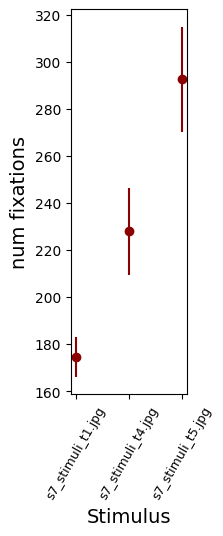

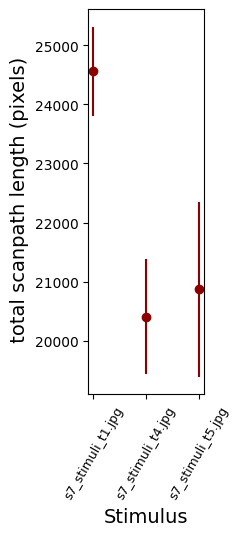

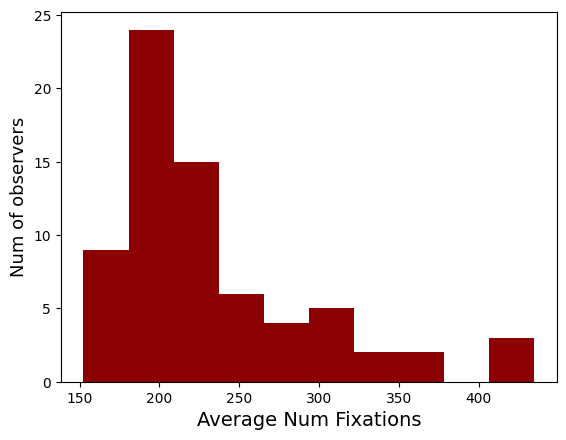

In [39]:

sizeX,sizeY=1680,1050


DyslexiaDat=EyeData(FixData,sizeX,sizeY)
DyslexiaDat.DataInfo(FixDuration='length',Stimulus='stimfile',subjectID='sid',StimPath=Path+'images/',StimExt='.jpg', mean_x='orig_fix_x', mean_y='orig_fix_y')
DyslexiaDat.RunDescriptiveFix(Visual=1)


In [40]:
CondIdx, Cond = DyslexiaDat.GetGroups('class_id')

Conditions [0 1]


In [41]:
def correctSub2Sub(Matrix):
    """
    Remove all the value equal to -np.inf and retrun the corrected matrix and a list of value that are not removed (position)
    """
    position = set()
    for i in range(Matrix.shape[0]):
        for j in range(Matrix.shape[1]):
            if Matrix[i,j] != -np.inf:
                position.add(i)

    CorrectMatrix = np.zeros((len(position),len(position)))
    position = list(position)
    for i in range(len(position)):
        for j in range(len(position)):
            CorrectMatrix[i,j] = Matrix[position[i],position[j]]

    return CorrectMatrix, position

In [31]:
def angle_difference_power(saccades1,saccades2,power=1):
    ''' this methods calculates differences between 0 and 90 degrees, between all pairs of saccades, than normalizes to the range 0-1, than averages
    by default it is just the mean absolute difference, but can be used for different exponentials by changing power from the default of 1'''
    diffs = np.abs(saccades1[:, np.newaxis] - saccades2) % 360
    mask = diffs > 180
    diffs[mask] = 360 - diffs[mask]
    return np.mean(np.abs((np.minimum(diffs, 180 - diffs)/90))**power)

def angle_difference_peak180(saccades1, saccades2, power=1):
    """
    Calculates differences between 0 and 180 degrees, with a peak of 1 at 180 degrees.
    Normalizes to the range 0–1, with a decrease back to 0 after 180 degrees.
    Allows for custom exponentials via the `power` parameter.
    """
    diffs = np.abs(saccades1[:, np.newaxis] - saccades2) % 360
    diffs = np.minimum(diffs, 360 - diffs) 
    normalized_diffs = (np.abs(diffs) / 180) 
    symmetric_diffs = 1 - np.abs(1 - normalized_diffs) 
    return np.mean(symmetric_diffs**power)

In [32]:
s1 = np.array([0,180])
s2 = np.array([0,180])

print(angle_difference_power(s1, s2, power=1))
print(angle_difference_peak180(s1, s2, power=1))

0.0
0.5


In [42]:
SaccadeObj=DyslexiaDat.GetSaccades()
Saccades=DyslexiaDat.SaccadeSel(SaccadeObj,nHor=9,InferS=False)

C:\Users\nickp\Documents\GitHub\PyEyeSim\PyEyeSim\scanpathshelpdebug.py:107: RuntimeWarning: invalid value encountered in arccos
  Ang=np.degrees(np.arccos((self.x2-self.x1)/self.length()))  #calculate angel of saccades


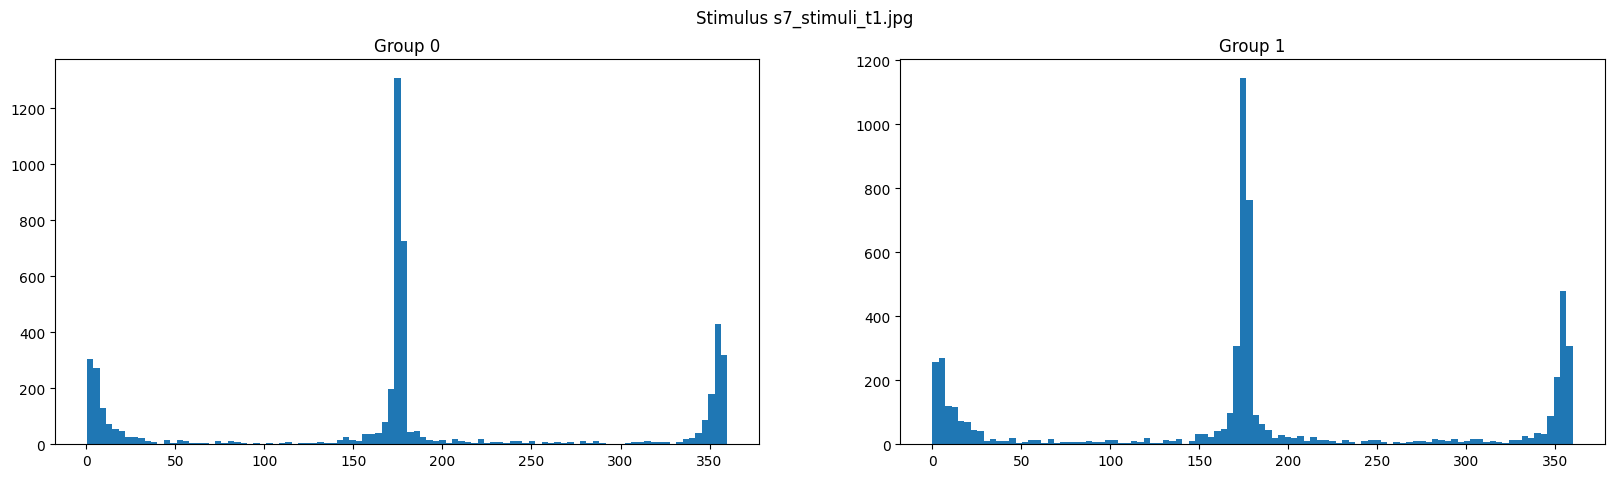

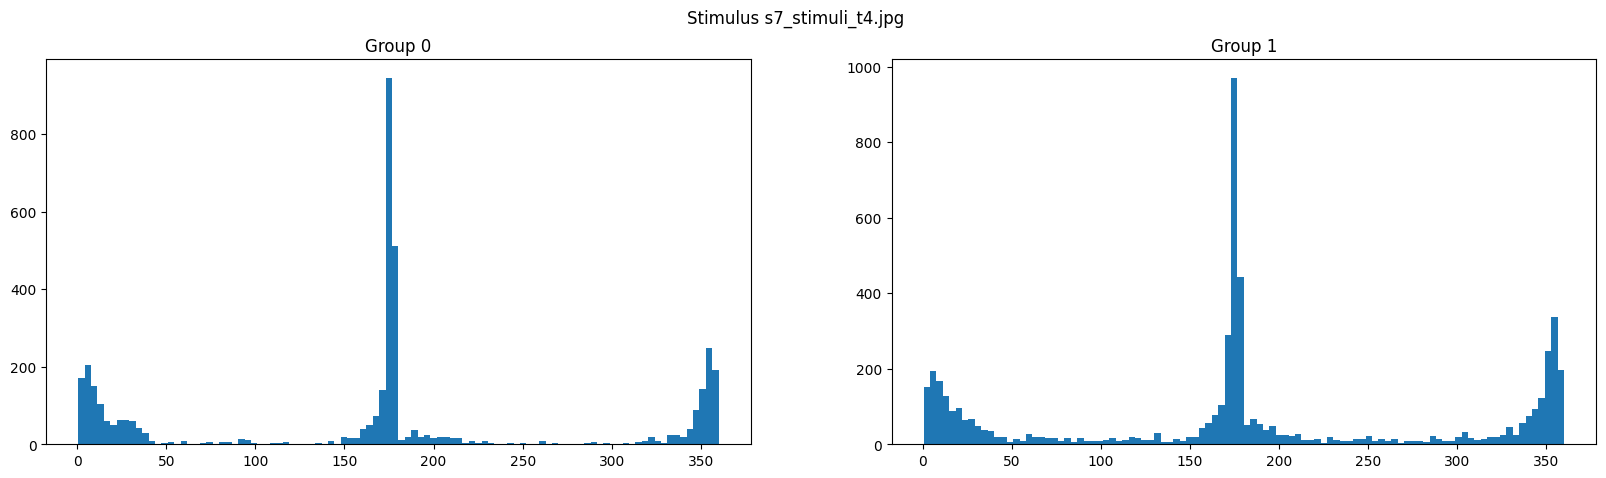

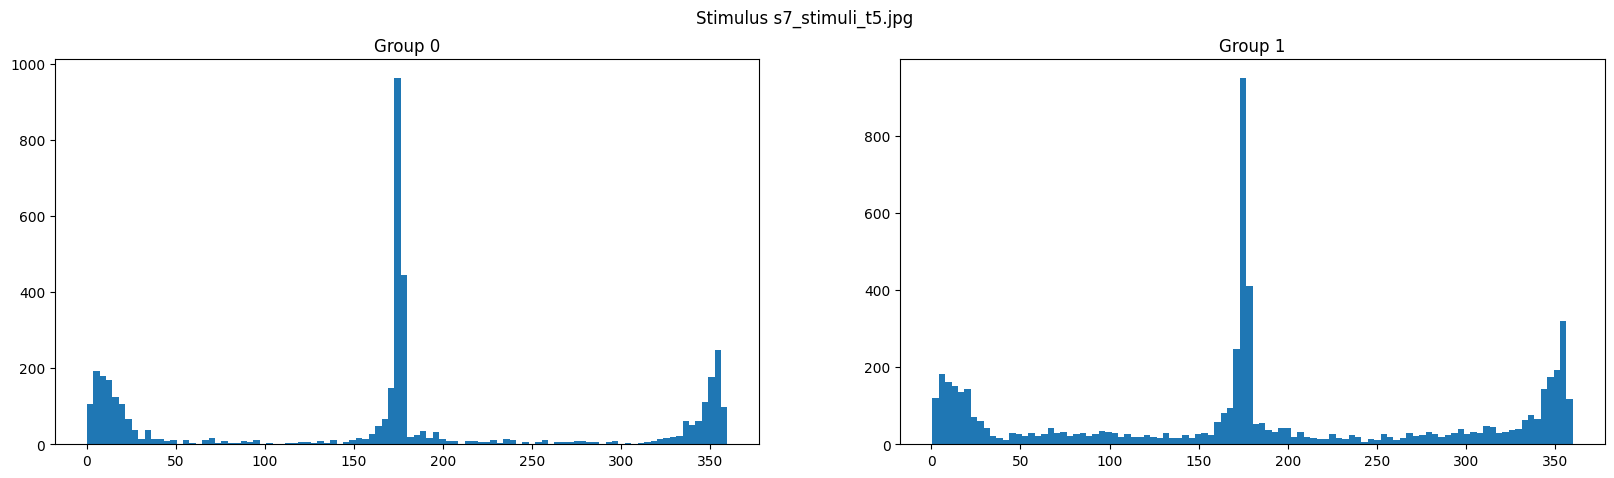

In [43]:
for i,stim in enumerate(DyslexiaDat.stimuli):
    # for every group of subjects show an istogram with the distribution of the saccades angles
    groups = np.unique(Cond)
    group_saccades = []
    for group in groups:
        # from Saccades[subject, :,:] get only the subjects that are in the group
        group_saccades.append(Saccades[Cond==group,i,:,:])

    group_saccades = np.array(group_saccades)
    fig, ax = plt.subplots(1, len(groups), figsize=(20, 5))
    fig.suptitle(f'Stimulus {stim}')

    for j, group in enumerate(group_saccades):
        angles = []
        for subj in group:
            for h in range(subj.shape[0]):
                for v in range(subj.shape[1]):
                    for val in subj[h,v]:
                        angles.append(val)
        ax[j].hist(angles, bins=100)
        ax[j].set_title(f'Group {j}')

In [46]:
def split_subjects(matrix, group_list):
    # get unique groups
    groups = np.unique(group_list)
    # create the new matrix
    M = []
    list_subj = []
    for group in groups:
        idx = np.where(group_list == group)[0]
        M.append(matrix[idx][:, idx])
        list_subj.append(idx)
    return M, list_subj

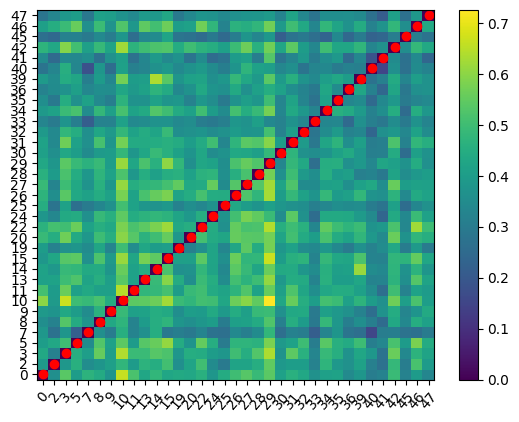

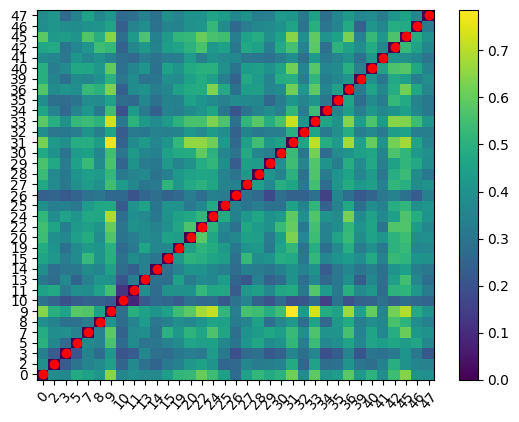

In [47]:
SimSacP,SimVals,SimValsSD = DyslexiaDat.ScanpathSimSubject2Subject(stim=1, nHor=9, inferS=False)
M, list_subj = split_subjects(SimVals, Cond)
DyslexiaDat.VisSimmat(M[0], stimuli=list(list_subj[0]), negative=True)
DyslexiaDat.VisSimmat(M[1], stimuli=list(list_subj[0]), negative=True)

C:\Users\nickp\Documents\GitHub\PyEyeSim\PyEyeSim\scanpathshelpdebug.py:107: RuntimeWarning: invalid value encountered in arccos
  Ang=np.degrees(np.arccos((self.x2-self.x1)/self.length()))  #calculate angel of saccades


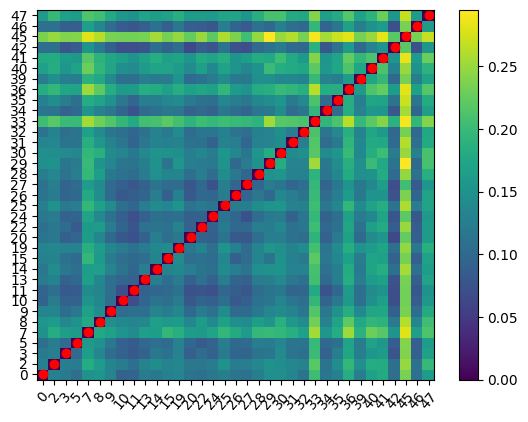

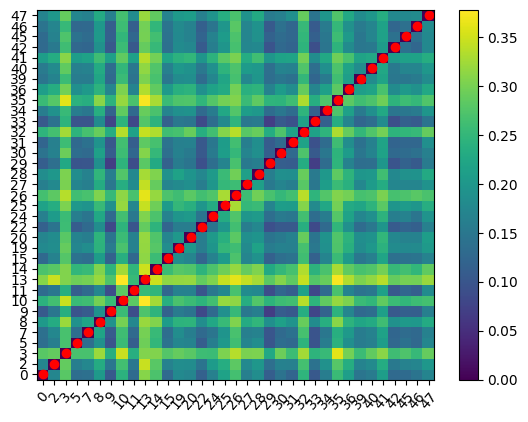

In [48]:
SimSacP,SimVals,SimValsSD = DyslexiaDat.ScanpathSimSubject2Subject(stim=1, nHor=9, inferS=False,method='power')
M, list_subj = split_subjects(SimVals, Cond)
DyslexiaDat.VisSimmat(M[0], stimuli=list(list_subj[0]), negative=True)
DyslexiaDat.VisSimmat(M[1], stimuli=list(list_subj[0]), negative=True)

C:\Users\nickp\Documents\GitHub\PyEyeSim\PyEyeSim\scanpathshelpdebug.py:107: RuntimeWarning: invalid value encountered in arccos
  Ang=np.degrees(np.arccos((self.x2-self.x1)/self.length()))  #calculate angel of saccades


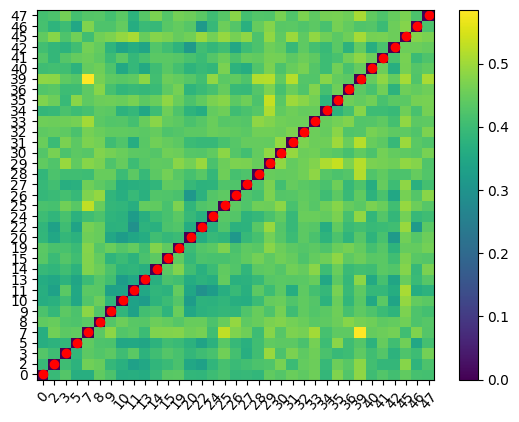

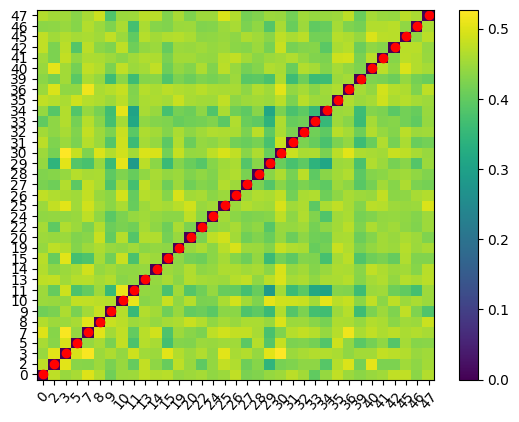

In [49]:
SimSacP,SimVals,SimValsSD = DyslexiaDat.ScanpathSimSubject2Subject(stim=1, nHor=9, inferS=False,method='peak180')
M, list_subj = split_subjects(SimVals, Cond)
DyslexiaDat.VisSimmat(M[0], stimuli=list(list_subj[0]), negative=True)
DyslexiaDat.VisSimmat(M[1], stimuli=list(list_subj[0]), negative=True)